In [ ]:
import pandas as pd 
import numpy as np 
import seaborn as sns  
import matplotlib.pyplot as plt 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import cross_val_score

In [ ]:
#load data 
df= pd.read_csv('/content/glass.data',header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [ ]:
#Naming the list based on the data
list_of_name =['Id','RI','Na','Mg','Al','Si','K','Ca','Ba','Fe','Type']

In [ ]:
df=df.set_axis(list_of_name ,axis=1)
df.head()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [ ]:
df.drop('Id',axis=1,inplace=True)
print(f'The DataFrame contains {df.shape[0]} rows and {df.shape[1]} columns.')

The DataFrame contains 214 rows and 10 columns.


In [ ]:
df.Type.value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [ ]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


DATA EXPLORATION AND VISUALIZATION

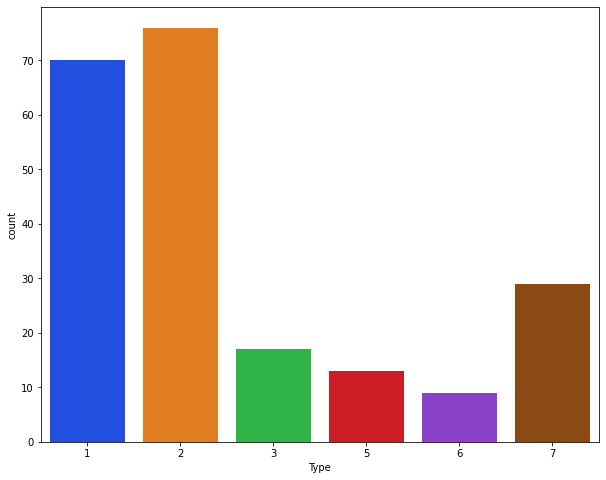

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(x='Type', data=df, palette='bright')
plt.show()

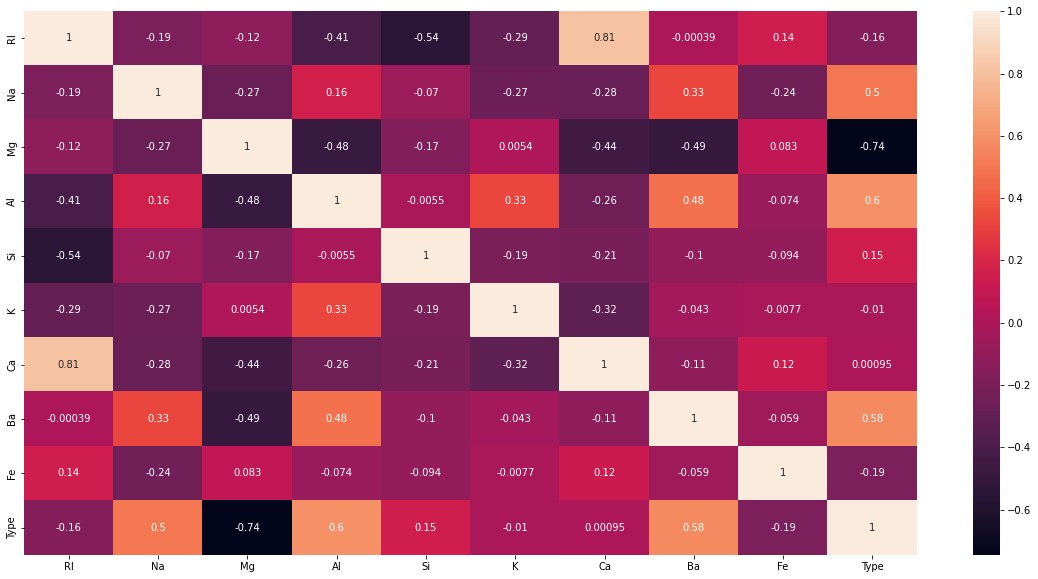

In [ ]:
# checking for correlations in the input data
plt.figure(figsize=(20,10))
corr_matrix = df.corr()
sns.heatmap(corr_matrix,annot=True)

From the plot it is evident that Ca and K don't effect the type that much , as there values are 0.00095 and -0.01 respectively . 
Since there is high corelation btwn Ca and RI we could drop Ca and K from the data.

In [ ]:
df.drop(['Ca','K'],axis=1,inplace=True)

In [ ]:
df.head()

,RI,Na,Mg,Al,Si,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.0,0.0,1


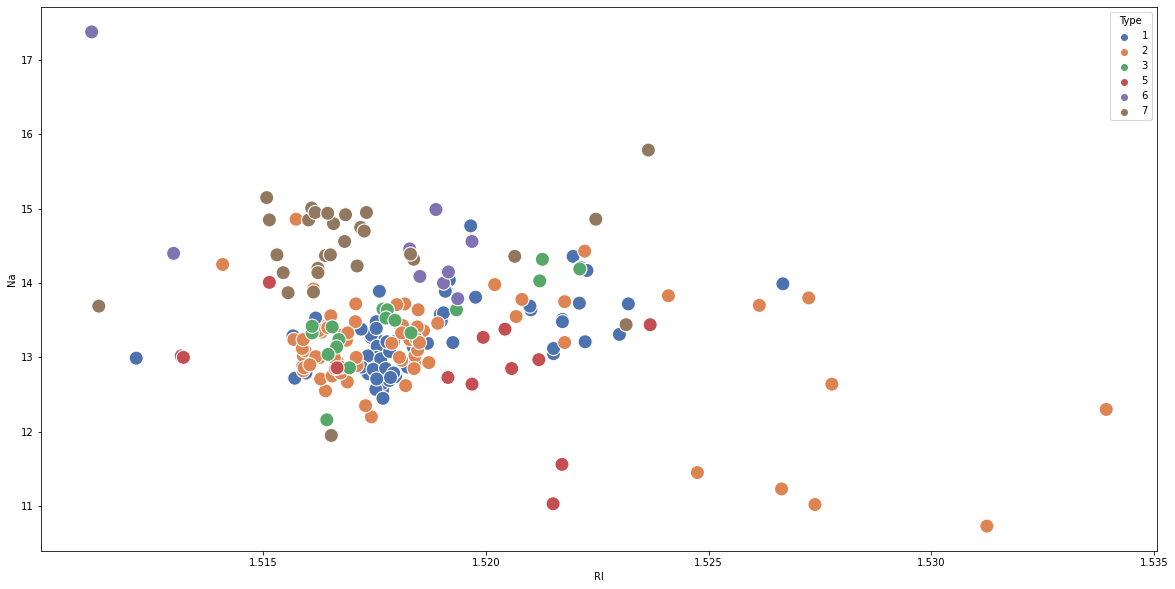

In [ ]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=df, x="RI", y="Na", hue="Type",s=200, palette="deep")

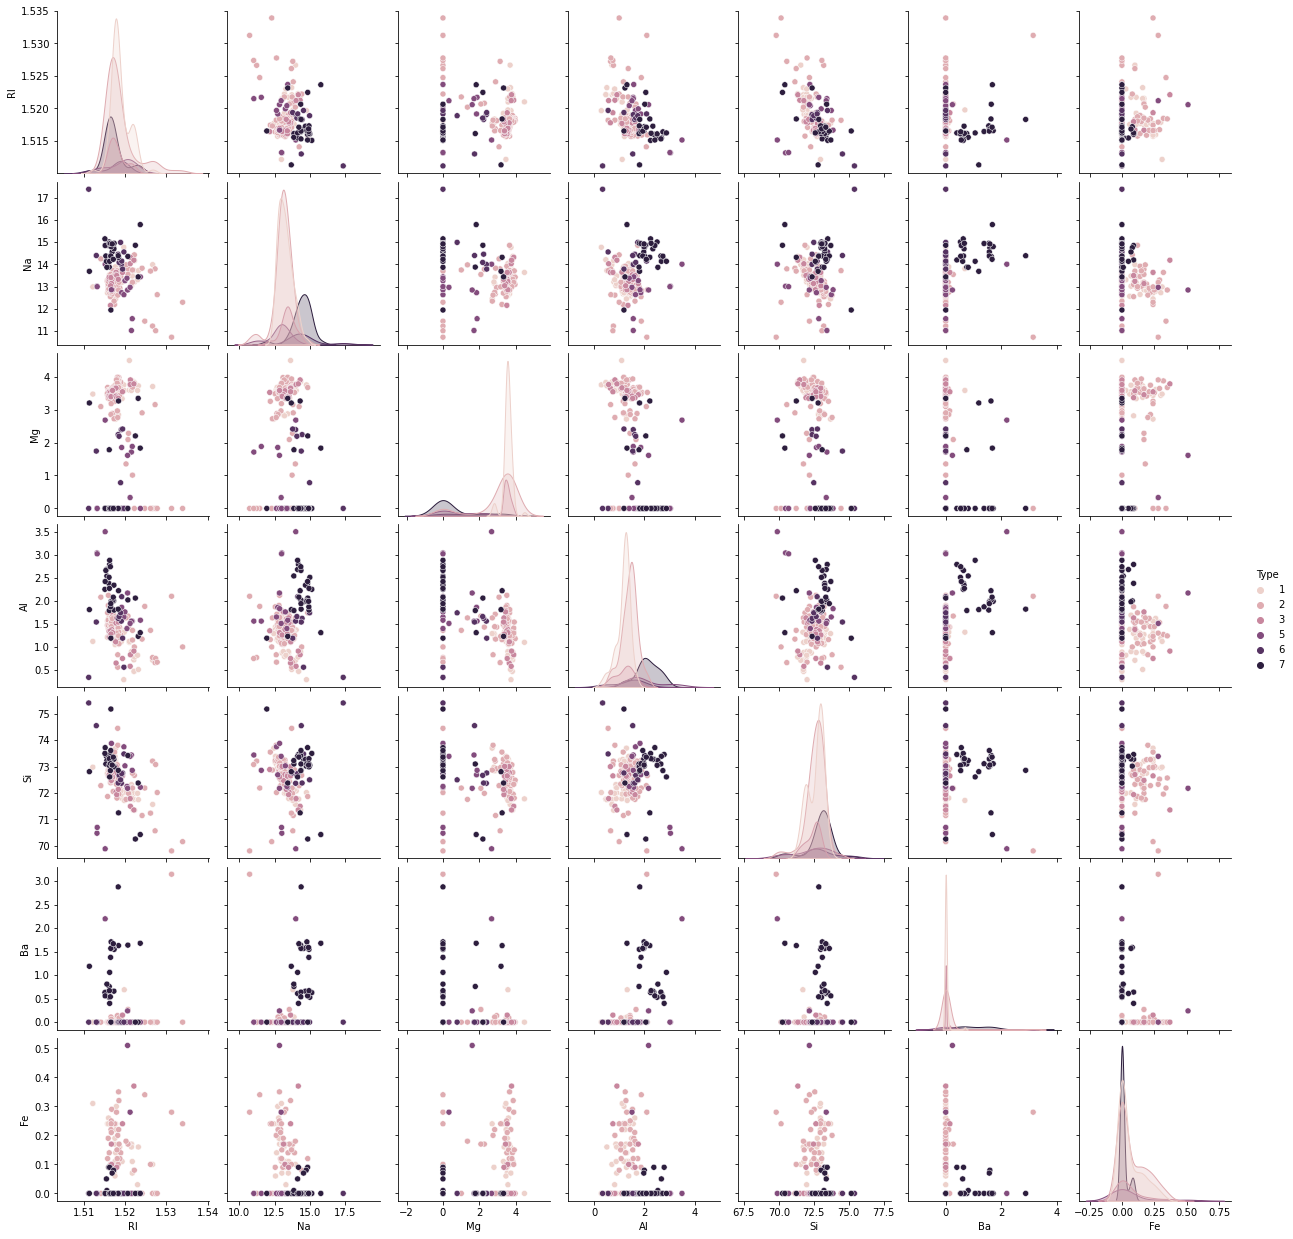

In [ ]:
#let us create pairwise plot to see if the datas have any chance to be linear .
sns.pairplot(df,hue='Type')
plt.show()

The pair plot shows that the data is not linear , hense KNN can be applied .

In [ ]:
x=df.iloc[:,:-1].values 
y=df.iloc[:,-1].values

In [ ]:
#splitting dataset
X_train,X_test,y_train,y_test  = train_test_split(x,y,test_size=0.3,random_state=45) 
#setting random state ensures split is same eveytime, so that the results are comparable

In [ ]:
print(X_train.shape)
print(y_train.shape)

(149, 7)
(149,)


In [ ]:
#Standardising the data 
sc = StandardScaler()
sc.fit(X_train)

X_train=sc.transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
X_train

array([[ 0.988551  , -2.13027954, -0.5653759 , ...,  0.29868092,
        -0.32749835, -0.58191645],
       [-0.09923032,  0.05176512,  0.89738347, ..., -0.18082634,
        -0.32749835, -0.58191645],
       [-0.76769929, -0.34497027,  0.62572816, ...,  0.60971266,
        -0.32749835, -0.58191645],
       ...,
       [ 2.33460442,  0.3668197 , -1.87489381, ..., -1.80078329,
        -0.32749835,  0.38470062],
       [-0.21165465,  0.168452  ,  0.50034879, ..., -0.76401084,
        -0.32749835, -0.58191645],
       [-0.5701971 ,  1.65037538, -1.87489381, ...,  0.62267231,
         2.91050337, -0.58191645]])

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=4,p=2,metric='minkowski')
model.fit(X_train, y_train)
#Power parameter for the Minkowski metric. 
#When p = 1,this is equivalent to using manhattan_distance (l1), 
# and euclidean_distance (l2)for p = 2. For arbitrary p, minkowski_distance (l_p) is used.

KNeighborsClassifier(n_neighbors=4)

In [ ]:
y_pred=model.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.64      0.90      0.75        20
           2       0.83      0.58      0.68        26
           3       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         1
           6       0.50      0.50      0.50         2
           7       1.00      0.85      0.92        13

    accuracy                           0.69        65
   macro avg       0.50      0.47      0.47        65
weighted avg       0.75      0.69      0.70        65



In [ ]:
accuracy_score(y_test,y_pred)

0.6923076923076923

The accuracy is 69.2%   when p value is set as 2(Euclidean_distance)

The accuracy is 73.846% when p value is set as 1(Manhattan distance)

Hense , we can say there is an approximate 5% hike is accuracy while using Manhattan over Eucledian method for distance calculation . 

Finding the best K value 
By plotting the Accuracy 

In [ ]:
k_value = np.arange(1,25,2) #range(1,25)
#since we have even number of output class (6) I take k values as output numbers
k_score =[]
# Change the value of p to change the plot of accuracy and error from manhattan to Euclidian if needed.

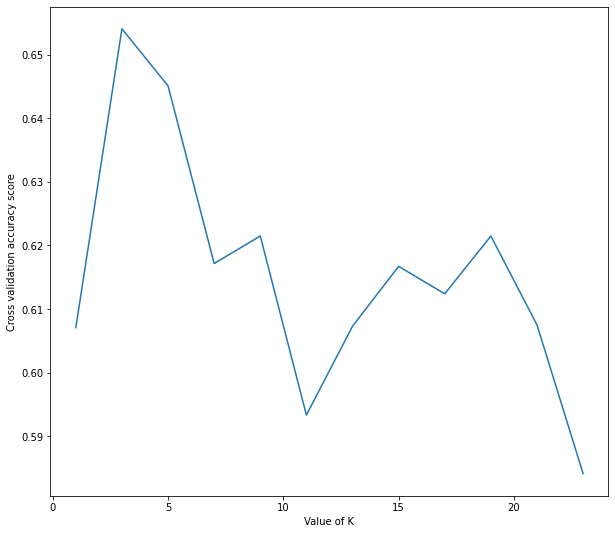

In [ ]:
for i in k_value:
  model_1 = KNeighborsClassifier(n_neighbors=i, p=1,metric='minkowski') 
  # score = accuracy 
  scores = cross_val_score(model_1,sc.transform(x),y,cv=5,scoring='accuracy')
  k_score.append(scores.mean())

plt.figure(figsize=(10,9))
plt.plot(k_value,k_score)
plt.xlabel('Value of K')
plt.ylabel('Cross validation accuracy score')
plt.show()

Finding the best value of K by plotting the error .

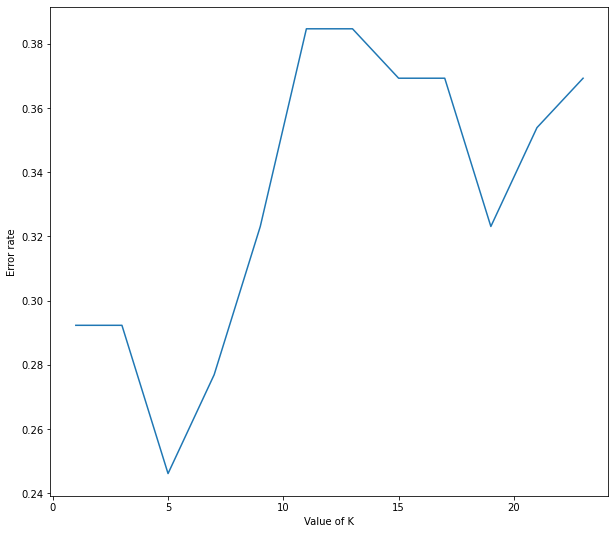

In [ ]:
error_values=[]

for i in k_value:
  model_1 = KNeighborsClassifier(n_neighbors=i, p=1,metric='minkowski') 
  model_1.fit(X_train,y_train)
  y_pred =model_1.predict(X_test)
  error_values.append(np.mean(y_pred != y_test)) 

plt.figure(figsize=(10,9))
plt.plot(k_value,error_values)
plt.xlabel('Value of K')
plt.ylabel('Error rate')
plt.show()

From the graph , K value gives better results for 3 and 4.